In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
%matplotlib inline

In [3]:
df1_o=pd.read_csv('train_qnU1GcL.csv')
df1_o.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,1


In [101]:
df1=df1_o.copy()
df1.shape

(79853, 12)

In [5]:
df1.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 97
Count_6-12_months_late                97
Count_more_than_12_months_late        97
application_underwriting_score      2974
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
target                                 0
dtype: int64

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79853 entries, 0 to 79852
Data columns (total 12 columns):
id                                  79853 non-null int64
perc_premium_paid_by_cash_credit    79853 non-null float64
age_in_days                         79853 non-null int64
Income                              79853 non-null int64
Count_3-6_months_late               79756 non-null float64
Count_6-12_months_late              79756 non-null float64
Count_more_than_12_months_late      79756 non-null float64
application_underwriting_score      76879 non-null float64
no_of_premiums_paid                 79853 non-null int64
sourcing_channel                    79853 non-null object
residence_area_type                 79853 non-null object
target                              79853 non-null int64
dtypes: float64(5), int64(5), object(2)
memory usage: 7.3+ MB


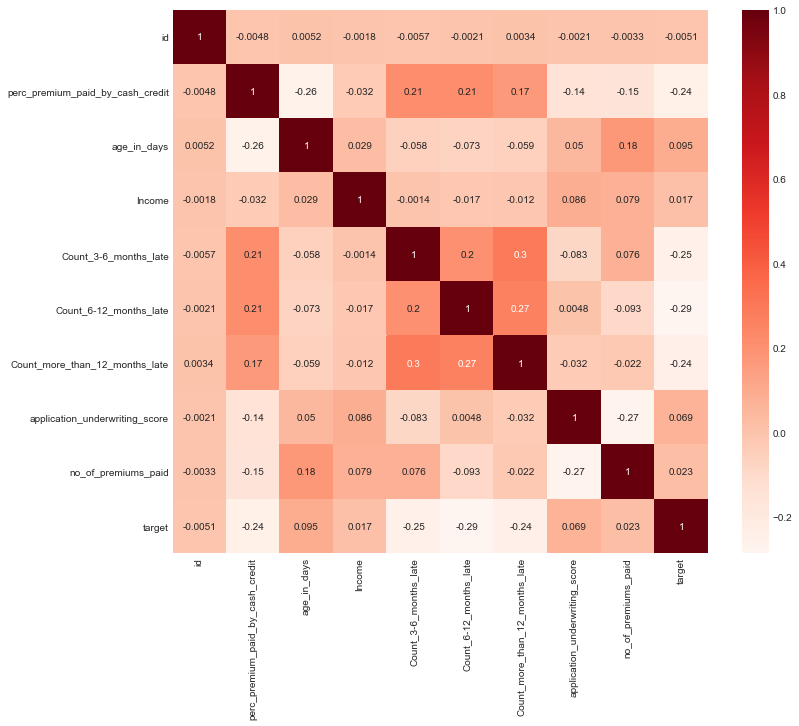

In [176]:
#correlation matrix
plt.figure(figsize=(12,10))
cor=df1.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.Reds)
plt.show()

In [177]:
#isolating(picking) features
cor_target=abs(cor['target'])
relevant_features=cor_target[cor_target>0.05]
print(relevant_features,'\n')

perc_premium_paid_by_cash_credit    0.240980
age_in_days                         0.095103
Count_3-6_months_late               0.248900
Count_6-12_months_late              0.286159
Count_more_than_12_months_late      0.240385
application_underwriting_score      0.068715
target                              1.000000
Name: target, dtype: float64 



In [7]:
df2_o=pd.read_csv('test_LxCaReE_DvdCKVT_iU3TGkw.csv')
df2_o.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type
0,649,0.001,27384,51150,0.0,0.0,0.0,99.89,7,A,Rural
1,81136,0.124,23735,285140,0.0,0.0,0.0,98.93,19,A,Urban
2,70762,1.000,17170,186030,0.0,0.0,0.0,NaN,2,B,Urban
3,53935,0.198,16068,123540,0.0,0.0,0.0,99.00,11,B,Rural
4,15476,0.041,10591,200020,1.0,0.0,0.0,99.17,14,A,Rural


In [8]:
df2=df2_o.copy()
df2.shape

(34224, 11)

In [10]:
df2.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 31
Count_6-12_months_late                31
Count_more_than_12_months_late        31
application_underwriting_score      1323
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
dtype: int64

In [9]:
y=df1['target']
df1.drop(['target'],axis=1,inplace=True)

In [102]:
dependent_var=df1['target']

In [183]:
df_o=pd.concat([df1,df2],sort=False,axis=0)

In [184]:
df=df_o.copy()

In [12]:
df['sourcing_channel'].unique()

array(['C', 'A', 'B', 'D', 'E'], dtype=object)

In [13]:
df['residence_area_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [185]:
df=df.replace({'sourcing_channel': {'C' :0,'A' :1,'B':2,'D':3,'E':4},
                'residence_area_type':{'Urban':0,'Rural':1} 
                    })

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114077 entries, 0 to 34223
Data columns (total 12 columns):
id                                  114077 non-null int64
perc_premium_paid_by_cash_credit    114077 non-null float64
age_in_days                         114077 non-null int64
Income                              114077 non-null int64
Count_3-6_months_late               113949 non-null float64
Count_6-12_months_late              113949 non-null float64
Count_more_than_12_months_late      113949 non-null float64
application_underwriting_score      109780 non-null float64
no_of_premiums_paid                 114077 non-null int64
sourcing_channel                    114077 non-null int64
residence_area_type                 114077 non-null int64
target                              79853 non-null float64
dtypes: float64(6), int64(6)
memory usage: 11.3 MB


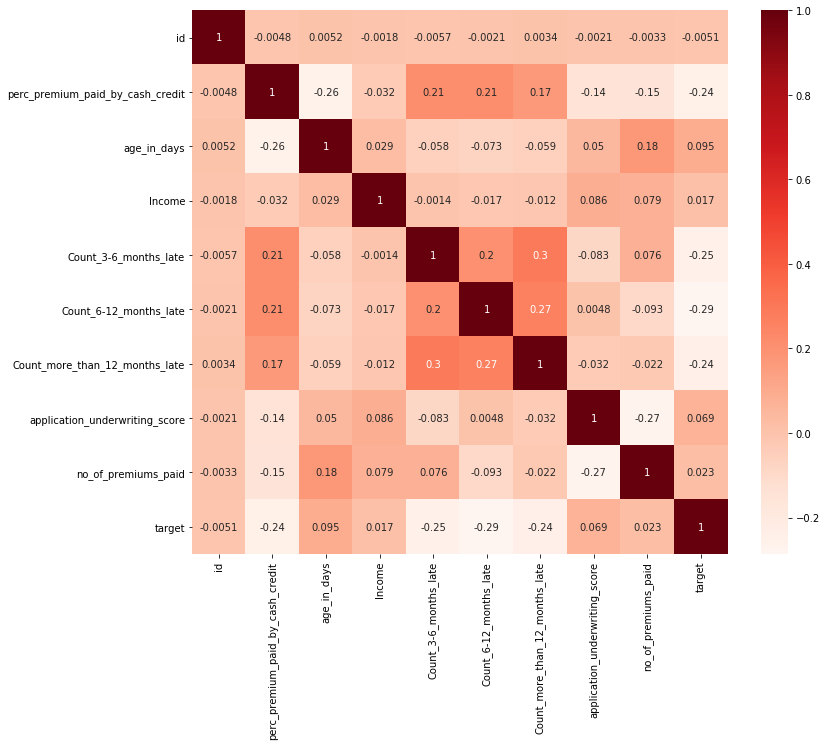

In [39]:
#correlation matrix
plt.figure(figsize=(12,10))
cor=df1_o.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.Reds)
plt.show()

In [41]:
#isolating(picking) features
cor_target=abs(cor['target'])
relevant_features=cor_target[cor_target>0.005]
print(relevant_features,'\n')

id                                  0.005064
perc_premium_paid_by_cash_credit    0.240980
age_in_days                         0.095103
Income                              0.016541
Count_3-6_months_late               0.248900
Count_6-12_months_late              0.286159
Count_more_than_12_months_late      0.240385
application_underwriting_score      0.068715
no_of_premiums_paid                 0.022664
target                              1.000000
Name: target, dtype: float64 



In [187]:
q3=df['age_in_days'].quantile(0.75)
q1=df['age_in_days'].quantile(0.25)
iqr=q3-q1
nm=df.loc[~((df['age_in_days']<(q1-1.5*iqr)) | (df['age_in_days']>(q3+1.5*iqr))),'age_in_days'].mean()
df.loc[(df['age_in_days']<(q1-1.5*iqr)) | (df['age_in_days']>(q3+1.5*iqr)),'age_in_days']=nm

In [188]:
df['Income']=np.log(df['Income']) 

In [189]:
df['Count_3-6_months_late']=np.sqrt(df['Count_3-6_months_late'])

In [190]:
df['Count_6-12_months_late']=np.sqrt(df['Count_6-12_months_late'])

In [191]:
df['Count_more_than_12_months_late']=np.sqrt(df['Count_more_than_12_months_late']) 

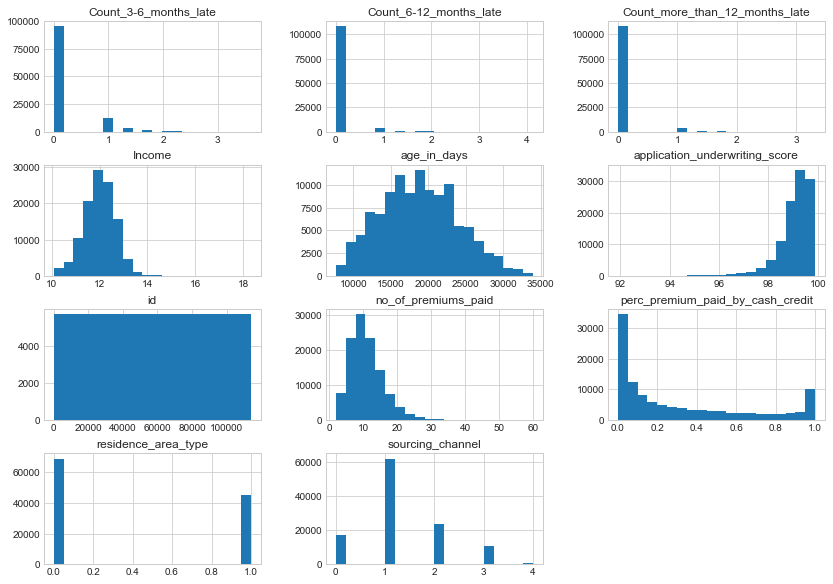

In [20]:
plt.style.use('seaborn-whitegrid')
df.hist(bins=20,figsize=(14,10))
plt.show()

In [41]:
df.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                128
Count_6-12_months_late               128
Count_more_than_12_months_late       128
application_underwriting_score      4297
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
dtype: int64

In [45]:
df.describe()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type
count,114077.000000,114077.000000,114077.000000,114077.000000,113949.000000,113949.000000,113949.000000,109780.000000,114077.000000,114077.000000,114077.000000
mean,57039.000000,0.314339,18831.137517,12.000568,0.191606,0.059540,0.051151,99.065675,10.871850,1.266680,0.396977
std,32931.337666,0.334657,5206.338665,0.657971,0.457141,0.274596,0.238376,0.740743,5.184576,0.855352,0.489273
min,1.000000,0.000000,7670.000000,10.087058,0.000000,0.000000,0.000000,91.900000,2.000000,0.000000,0.000000
25%,28520.000000,0.034000,14974.000000,11.585804,0.000000,0.000000,0.000000,98.810000,7.000000,1.000000,0.000000
50%,57039.000000,0.168000,18625.000000,12.015154,0.000000,0.000000,0.000000,99.210000,10.000000,1.000000,0.000000
75%,85558.000000,0.539000,22636.000000,12.431015,0.000000,0.000000,0.000000,99.530000,14.000000,2.000000,1.000000
max,114077.000000,1.000000,33960.000000,18.318234,3.605551,4.123106,3.316625,99.890000,60.000000,4.000000,1.000000


In [192]:
df['Count_3-6_months_late'].fillna(df['Count_3-6_months_late'].mean(),inplace=True)
df['Count_6-12_months_late'].fillna(df['Count_6-12_months_late'].mean(),inplace=True)
df['Count_more_than_12_months_late'].fillna(df['Count_more_than_12_months_late'].mean(),inplace=True)
df['Count_more_than_12_months_late'].fillna(df['Count_more_than_12_months_late'].mean(),inplace=True)
df['application_underwriting_score'].fillna(df['application_underwriting_score'].mean(),inplace=True)

In [193]:
df.isnull().sum()

id                                      0
perc_premium_paid_by_cash_credit        0
age_in_days                             0
Income                                  0
Count_3-6_months_late                   0
Count_6-12_months_late                  0
Count_more_than_12_months_late          0
application_underwriting_score          0
no_of_premiums_paid                     0
sourcing_channel                        0
residence_area_type                     0
target                              34224
dtype: int64

In [201]:
df_o.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114077 entries, 0 to 34223
Data columns (total 12 columns):
id                                  114077 non-null int64
perc_premium_paid_by_cash_credit    114077 non-null float64
age_in_days                         114077 non-null int64
Income                              114077 non-null int64
Count_3-6_months_late               113949 non-null float64
Count_6-12_months_late              113949 non-null float64
Count_more_than_12_months_late      113949 non-null float64
application_underwriting_score      109780 non-null float64
no_of_premiums_paid                 114077 non-null int64
sourcing_channel                    114077 non-null object
residence_area_type                 114077 non-null object
target                              79853 non-null float64
dtypes: float64(6), int64(4), object(2)
memory usage: 11.3+ MB


In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114077 entries, 0 to 34223
Data columns (total 10 columns):
perc_premium_paid_by_cash_credit    114077 non-null float64
age_in_days                         114077 non-null float64
Income                              114077 non-null float64
Count_3-6_months_late               114077 non-null float64
Count_6-12_months_late              114077 non-null float64
Count_more_than_12_months_late      114077 non-null float64
application_underwriting_score      114077 non-null float64
no_of_premiums_paid                 114077 non-null int64
sourcing_channel                    114077 non-null int64
residence_area_type                 114077 non-null int64
dtypes: float64(7), int64(3)
memory usage: 9.6 MB


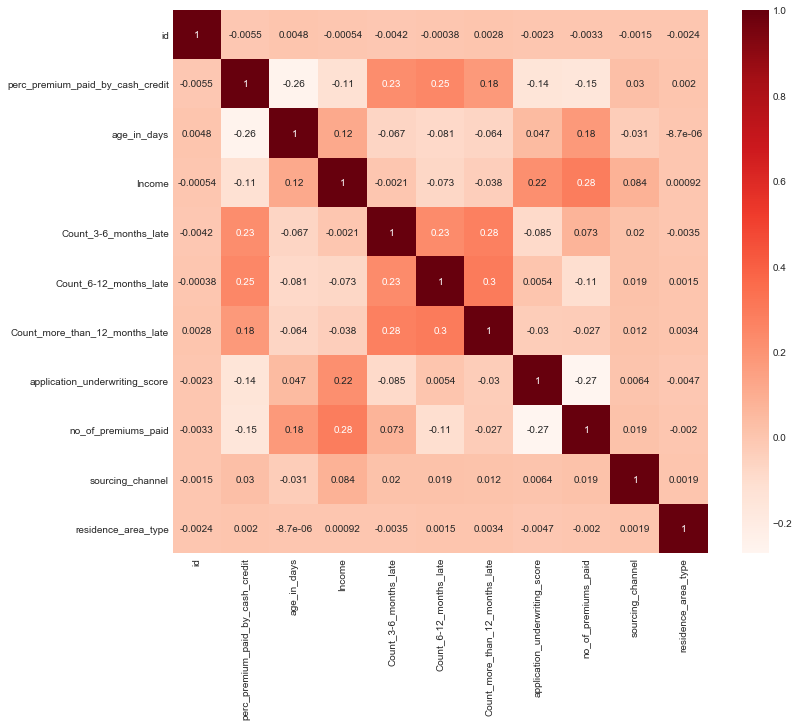

In [54]:
#correlation matrix
plt.figure(figsize=(12,10))
cor=df.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.Reds)
plt.show()

In [55]:
#isolating(picking) features
cor_target=abs(cor['application_underwriting_score'])
relevant_features=cor_target[cor_target>0.05]
print(relevant_features,'\n')

perc_premium_paid_by_cash_credit    0.143754
Income                              0.219021
Count_3-6_months_late               0.084849
application_underwriting_score      1.000000
no_of_premiums_paid                 0.272328
Name: application_underwriting_score, dtype: float64 



In [57]:
dflin=df[['perc_premium_paid_by_cash_credit','Income','application_underwriting_score','no_of_premiums_paid']]

In [74]:
test=dflin[dflin['application_underwriting_score'].isnull()]
train=dflin[~(dflin['application_underwriting_score'].isnull())]

In [75]:
test.drop(['application_underwriting_score'],inplace=True,axis=1)

In [77]:
y=train['application_underwriting_score']
train.drop(['application_underwriting_score'],inplace=True,axis=1)

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
train_x,test_x,train_y,test_y=train_test_split(train,y,test_size=0.2)

In [80]:
from sklearn.linear_model import LinearRegression

In [81]:
lin_reg=LinearRegression()

In [82]:
lin_reg_trained=lin_reg.fit(train_x,train_y)

In [83]:
print(f'training accuracy is: {lin_reg.score(train_x,train_y)}')

training accuracy is: 0.1951296157589798


In [85]:
pred=lin_reg.predict(test_x)

In [89]:
lin_reg.score(test_x,test_y)

0.19765046549262788

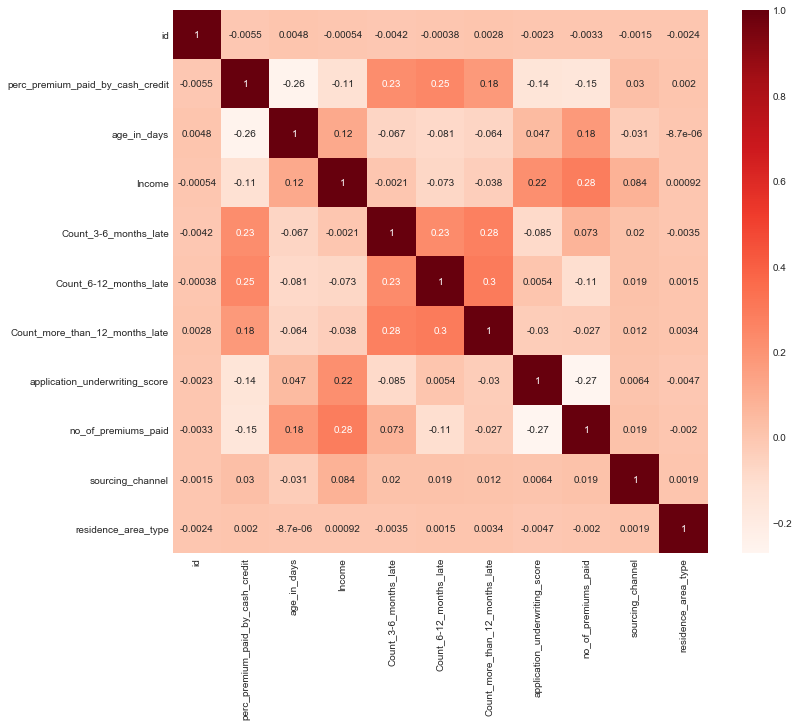

In [90]:
#correlation matrix
plt.figure(figsize=(12,10))
cor=df.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.Reds)
plt.show()

In [91]:
#isolating(picking) features
cor_target=abs(cor['Count_3-6_months_late'])
relevant_features=cor_target[cor_target>0.05]
print(relevant_features,'\n')

perc_premium_paid_by_cash_credit    0.225736
age_in_days                         0.067444
Count_3-6_months_late               1.000000
Count_6-12_months_late              0.232695
Count_more_than_12_months_late      0.278167
application_underwriting_score      0.084849
no_of_premiums_paid                 0.072933
Name: Count_3-6_months_late, dtype: float64 



In [32]:
train=df[:79853]
test=df[79853:]

In [33]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5, weights="uniform")
col=['perc_premium_paid_by_cash_credit','Income','application_underwriting_score', 'no_of_premiums_paid','Count_3-6_months_late'] 
X_tr=train[col]
X_test=test[col] 
X_tr=imputer.fit_transform(X_tr)
X_test=imputer.transform(X_test) 
train=train.join(pd.DataFrame({'imp':X_tr[:,- 1]}))
test=test.join(pd.DataFrame({'imp':X_test[:,- 1]}))

train=train.drop(['Count_3-6_months_late'],axis=1)
test=test.drop(['Count_3-6_months_late'],axis=1)

Id=train.program_id.unique()
for i in range(len(Id)):
    train=train.replace({Id[i]:i})
    test=test.replace({Id[i]:i})

(79853, 11)

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5, weights="uniform")
col=['perc_premium_paid_by_cash_credit','age_in_days','Income','application_underwriting_score', 'no_of_premiums_paid','Count_3-6_months_late','Count_6-12_months_late'] 
X_tr=train[col]
X_test=test[col] 
X_tr=imputer.fit_transform(X_tr)
X_test=imputer.transform(X_test) 
train=train.join(pd.DataFrame({'imp':X_tr[:,- 1]}))
test=test.join(pd.DataFrame({'imp':X_test[:,- 1]}))

train=train.drop(['Count_6-12_months_late'],axis=1)
test=test.drop(['Count_6-12_months_late'],axis=1)

Id=train.program_id.unique()
for i in range(len(Id)):
    train=train.replace({Id[i]:i})
    test=test.replace({Id[i]:i})

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5, weights="uniform")
col=['perc_premium_paid_by_cash_credit','age_in_days','Income','application_underwriting_score', 'no_of_premiums_paid','Count_3-6_months_late','Count_6-12_months_late','Count_more_than_12_months_late'] 
X_tr=train[col]
X_test=test[col] 
X_tr=imputer.fit_transform(X_tr)
X_test=imputer.transform(X_test) 
train=train.join(pd.DataFrame({'imp':X_tr[:,- 1]}))
test=test.join(pd.DataFrame({'imp':X_test[:,- 1]}))

train=train.drop(['Count_more_than_12_months_late'],axis=1)
test=test.drop(['Count_more_than_12_months_late'],axis=1)

Id=train.program_id.unique()
for i in range(len(Id)):
    train=train.replace({Id[i]:i})
    test=test.replace({Id[i]:i})

In [24]:
#correlation matrix
plt.figure(figsize=(12,10))
cor=df.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.Reds)
plt.show()

(34224, 12)

In [ ]:
#isolating(picking) features
cor_target=abs(cor['application_underwriting_score'])
relevant_features=cor_target[cor_target>0.2]
print(relevant_features,'\n')

In [94]:
from sklearn.preprocessing import MinMaxScaler

In [95]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df)

In [96]:
dX=pd.DataFrame(X)
dX.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.972466,0.429,0.166908,0.327169,0.000000,0.000000,0.000000,0.891114,0.189655,0.00,0.0
1,0.363714,0.010,0.527805,0.312683,0.000000,0.000000,0.000000,1.000000,0.327586,0.25,0.0
2,0.274370,0.917,0.375086,0.152248,0.392232,0.420084,0.301511,0.849812,0.086207,0.00,1.0
3,0.170185,0.049,0.291784,0.284795,0.000000,0.000000,0.000000,0.959950,0.120690,0.25,0.0
4,0.871156,0.052,0.902625,0.256633,0.000000,0.000000,0.000000,0.997497,0.172414,0.50,0.0


In [98]:
col=list(df.columns)
dX.columns=col
dX.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type
0,0.972466,0.429,0.166908,0.327169,0.000000,0.000000,0.000000,0.891114,0.189655,0.00,0.0
1,0.363714,0.010,0.527805,0.312683,0.000000,0.000000,0.000000,1.000000,0.327586,0.25,0.0
2,0.274370,0.917,0.375086,0.152248,0.392232,0.420084,0.301511,0.849812,0.086207,0.00,1.0
3,0.170185,0.049,0.291784,0.284795,0.000000,0.000000,0.000000,0.959950,0.120690,0.25,0.0
4,0.871156,0.052,0.902625,0.256633,0.000000,0.000000,0.000000,0.997497,0.172414,0.50,0.0


In [160]:
dX=dX.drop(['id'],axis=1)

KeyError: "['id'] not found in axis"

In [161]:
dX.head()

,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type
0,0.429,0.166908,0.327169,0.000000,0.000000,0.000000,0.891114,0.189655,0.00,0.0
1,0.010,0.527805,0.312683,0.000000,0.000000,0.000000,1.000000,0.327586,0.25,0.0
2,0.917,0.375086,0.152248,0.392232,0.420084,0.301511,0.849812,0.086207,0.00,1.0
3,0.049,0.291784,0.284795,0.000000,0.000000,0.000000,0.959950,0.120690,0.25,0.0
4,0.052,0.902625,0.256633,0.000000,0.000000,0.000000,0.997497,0.172414,0.50,0.0


In [215]:
df_num_train=dX[:79853]
df_num_test=dX[79853:]

In [216]:
train_len=int(0.8*(df1.shape[0]))

In [217]:
train_x,train_y=df_num_train[:train_len],dependent_var[:train_len]
test_x,test_y=df_num_train[train_len:],dependent_var[train_len:]

In [218]:
from sklearn.metrics import classification_report, confusion_matrix

In [219]:
from sklearn.linear_model import LogisticRegression

In [220]:
log_reg=LogisticRegression(solver='lbfgs', penalty='l2', max_iter=1000000)

In [221]:
log_reg_trained=log_reg.fit(train_x,train_y)

In [222]:
print(f'training accuracy is: {log_reg.score(train_x,train_y)}')

training accuracy is: 0.9396387088694781


In [223]:
pred=log_reg.predict(test_x)

In [167]:
print(f'test accuracy is {sk.metrics.accuracy_score(test_y,pred)}')

test accuracy is 0.9399536660196607


In [168]:
confusion_matrix(test_y,predict)

array([[  116,   857],
       [  107, 14891]], dtype=int64)

In [120]:
from sklearn.tree import DecisionTreeClassifier

In [224]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [225]:
RFC = RandomForestClassifier(max_depth=7,min_samples_leaf=4)

In [226]:
RFC.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [227]:
predict=RFC.predict(test_x)

In [228]:
print ("\nAUC - ROC : ", roc_auc_score(test_y,predict))


AUC - ROC :  0.5402512729686328


In [230]:
# defining a function which will return the rmsle score
def rmsle(y, y_pred):
    assert len(y)== len(y_pred)
    #terms_to_sum = [(math.log(y_pred[i] + 1) - math.log(y[i] + 1)) ** 2.0 for i,pred in enumerate(y_pred)]
    return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y))**2))

In [231]:
rmsle(test_y, predict)

0.17011669715561903

In [194]:
df.drop(['id','target'],axis=1,inplace=True)

In [195]:
train=df[:79853]
test=df[79853:]
train.head()

,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type
0,0.429,12058.0,12.780042,0.000000,0.000000,0.0,99.02,13,0,0
1,0.010,21546.0,12.660804,0.000000,0.000000,0.0,99.89,21,1,0
2,0.917,17531.0,11.340237,1.414214,1.732051,1.0,98.69,7,0,1
3,0.049,15341.0,12.431254,0.000000,0.000000,0.0,99.57,9,1,0
4,0.052,31400.0,12.199451,0.000000,0.000000,0.0,99.87,12,2,0


In [196]:
from catboost import CatBoostClassifier,Pool
from sklearn.model_selection import train_test_split

In [197]:
train_y=dependent_var
x_train,x_valid,y_train,y_valid=train_test_split(train,train_y,train_size =0.8)

In [202]:
cat_features=[7,8,9]

In [203]:
train_pool=Pool(train, train_y, cat_features=cat_features)
test_pool=Pool(test, cat_features =cat_features) 

In [204]:
weight=[1, 0.43]

In [205]:
model = CatBoostClassifier(
        iterations=5000,logging_level="Silent",early_stopping_rounds=500,
    use_best_model=True,custom_loss=["AUC"], class_weights=weight, 
        eval_metric="AUC")

In [206]:
model.fit(  x_train,y_train, 
        cat_features=cat_features,
        eval_set=(x_valid,y_valid),
        plot=True 
        )

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [207]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_valid, model.predict_proba(x_valid) [:,1]) 

0.8542795565370849

In [209]:
b=model.predict(test)

In [115]:
pred_test=log_reg.predict(df_num_test)

In [210]:
a=df2_o['id']

In [117]:
b=pred_test

In [211]:
import csv
with open('sample_submission_ger7W7I.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['id','target'])
    for i in range(len(b)):
        writer.writerow([a[i],b[i]])

In [6]:
from datetime import datetime
from datetime import timezone
dt = datetime(2021, 10, 20)
timestamp = dt.replace(tzinfo=timezone.utc).timestamp()
print(timestamp)

1634688000.0
